In [2]:
#install require libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
df = pd.read_csv("C:/Users/sidda/Desktop/project 97/TMT-JUNE-2020_2 (1) - Copy.csv")  # reading dataset with pandas

In [5]:
df.columns

Index(['Date', 'Time', 'Location', 'Sales in Rs/T', 'Sales volume in Tonnes',
       'Price/ kg', 'Climate', 'Customer ID', 'Diameter', 'Length', 'Grade',
       'Current stock', 'Re-order', 'Lead time', 'Production time',
       'Units Produced ', 'Production cost'],
      dtype='object')

In [6]:
df=df.drop(['Time', 'Location', 'Sales in Rs/T',
       'Price/ kg', 'Climate', 'Customer ID', 'Diameter', 'Length', 'Grade',
       'Current stock', 'Re-order', 'Lead time', 'Production time',
       'Units Produced ', 'Production cost'], axis=1)

In [7]:
df

,Date,Sales volume in Tonnes
0,14-10-1995,7.07
1,15-10-1995,8.35
2,16-10-1995,6.82
3,17-10-1995,6.86
4,18-10-1995,7.45
...,...,...
9995,24-02-2023,9.13
9996,25-02-2023,9.99
9997,26-02-2023,8.84
9998,27-02-2023,7.64


<AxesSubplot:>

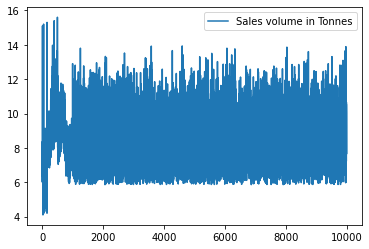

In [8]:
df.plot()

In [9]:
df.columns = ['ds','y']
df.head()

,ds,y
0,14-10-1995,7.07
1,15-10-1995,8.35
2,16-10-1995,6.82
3,17-10-1995,6.86
4,18-10-1995,7.45


In [10]:
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
df

,ds,y
0,1995-10-14,7.07
1,1995-10-15,8.35
2,1995-10-16,6.82
3,1995-10-17,6.86
4,1995-10-18,7.45
...,...,...
9995,2023-02-24,9.13
9996,2023-02-25,9.99
9997,2023-02-26,8.84
9998,2023-02-27,7.64


In [12]:
df['y']= pd.DataFrame(df['y'].interpolate(method='linear'))

In [13]:
#df['ds']=pd.to_datetime(df['ds'])
# set the Date column be the index of our dataset
#df= df.set_index('ds')
# now check the data shape

In [14]:
#Calculate ad fuller statistic
adf = adfuller(df['y'])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.0 , Series is Stationary


In [43]:
!pip install fbprophet


In [15]:
from fbprophet import Prophet

In [16]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [17]:
inde_f=pd.date_range(start = '2023-02-28', periods=365)
inde_f

DatetimeIndex(['2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09',
               ...
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25',
               '2024-02-26', '2024-02-27'],
              dtype='datetime64[ns]', length=365, freq='D')

In [47]:
#pip install pystan==2.19.1.1

In [48]:
#pip install --upgrade numpy

In [49]:
!pip install prophet

  Using cached cmdstanpy-1.1.0-py3-none-any.whl (83 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.1.0 which is incompatible.
darts 0.23.1 requires requests>=2.22.0, but you have requests 2.18.4 which is incompatible.
auto-ts 0.0.69 requires pyyaml==5.4.1, but you have pyyaml 6.0 which is incompatible.


In [50]:
!pip install cmdstanpy==0.9.68

  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.68 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.23.1 requires requests>=2.22.0, but you have requests 2.18.4 which is incompatible.
auto-ts 0.0.69 requires pyyaml==5.4.1, but you have pyyaml 6.0 which is incompatible.


In [18]:
from prophet import Prophet

In [19]:
model= Prophet()


In [20]:
train=df.head(8000)
test=df.tail(2000)

In [21]:
model1=model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [22]:
 future = model1.make_future_dataframe(periods=2000, freq='D')


In [23]:
#future.index=inde_f

In [24]:
predictions=model1.predict(future)

In [25]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-01-11,7.683437,5.787473,9.604230,7.683437,7.683437,0.044606,0.044606,0.044606,0.017636,0.017636,0.017636,0.026970,0.026970,0.026970,0.0,0.0,0.0,7.728043
1,1995-01-12,7.684908,5.785958,9.490101,7.684908,7.684908,0.014799,0.014799,0.014799,-0.016917,-0.016917,-0.016917,0.031716,0.031716,0.031716,0.0,0.0,0.0,7.699707
2,1995-02-11,7.729032,5.691155,9.678551,7.729032,7.729032,-0.040383,-0.040383,-0.040383,-0.058959,-0.058959,-0.058959,0.018576,0.018576,0.018576,0.0,0.0,0.0,7.688649
3,1995-02-12,7.730503,5.718943,9.632189,7.730503,7.730503,0.003629,0.003629,0.003629,-0.014470,-0.014470,-0.014470,0.018099,0.018099,0.018099,0.0,0.0,0.0,7.734132
4,1995-03-11,7.770214,5.721553,9.535482,7.770214,7.770214,-0.073470,-0.073470,-0.073470,-0.058959,-0.058959,-0.058959,-0.014511,-0.014511,-0.014511,0.0,0.0,0.0,7.696744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-05-27,8.667427,6.620081,10.592936,8.226382,9.140007,-0.089679,-0.089679,-0.089679,-0.058959,-0.058959,-0.058959,-0.030720,-0.030720,-0.030720,0.0,0.0,0.0,8.577748
9996,2023-05-28,8.667467,6.566051,10.498588,8.226123,9.140445,-0.055499,-0.055499,-0.055499,-0.014470,-0.014470,-0.014470,-0.041029,-0.041029,-0.041029,0.0,0.0,0.0,8.611968
9997,2023-05-29,8.667508,6.575288,10.587990,8.225863,9.140882,-0.060632,-0.060632,-0.060632,-0.009670,-0.009670,-0.009670,-0.050962,-0.050962,-0.050962,0.0,0.0,0.0,8.606876
9998,2023-05-30,8.667548,6.606145,10.438171,8.225604,9.141319,-0.062281,-0.062281,-0.062281,-0.001881,-0.001881,-0.001881,-0.060400,-0.060400,-0.060400,0.0,0.0,0.0,8.605267


<AxesSubplot:>

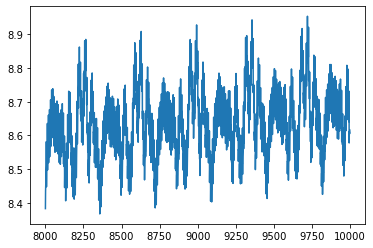

In [26]:
predictions['yhat'].tail(2000).plot()
#test['y'].plot()


In [27]:
y_true = df['y'][8000:10000].values
y_pred = predictions['yhat'][8000:10000].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


NameError: name 'mean_absolute_error' is not defined

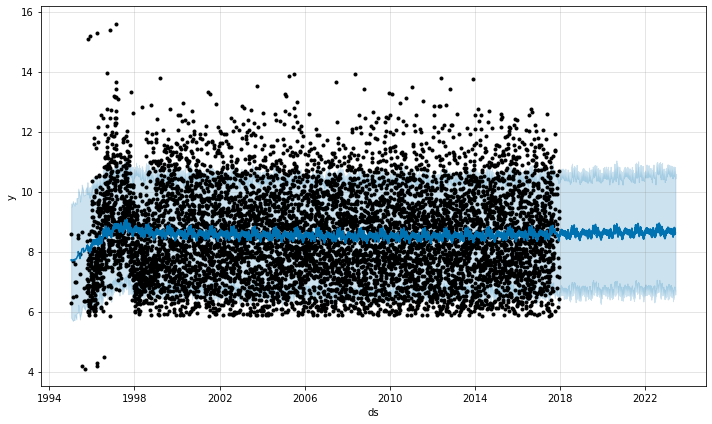

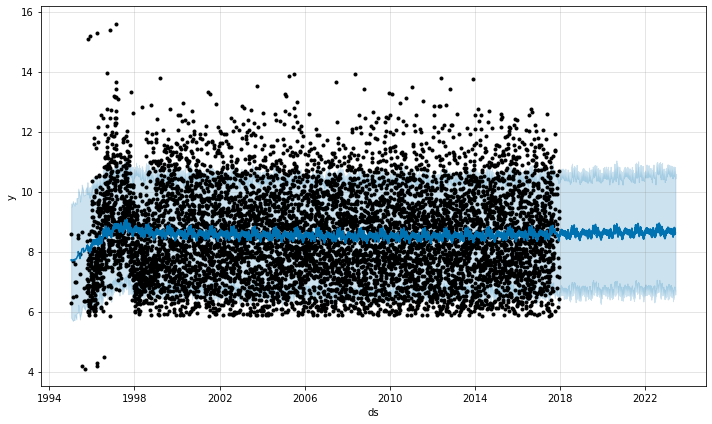

In [28]:
model1.plot(predictions)

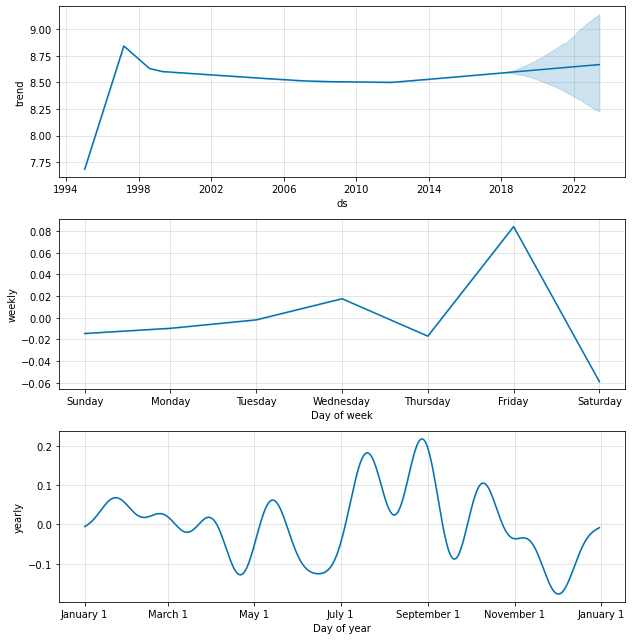

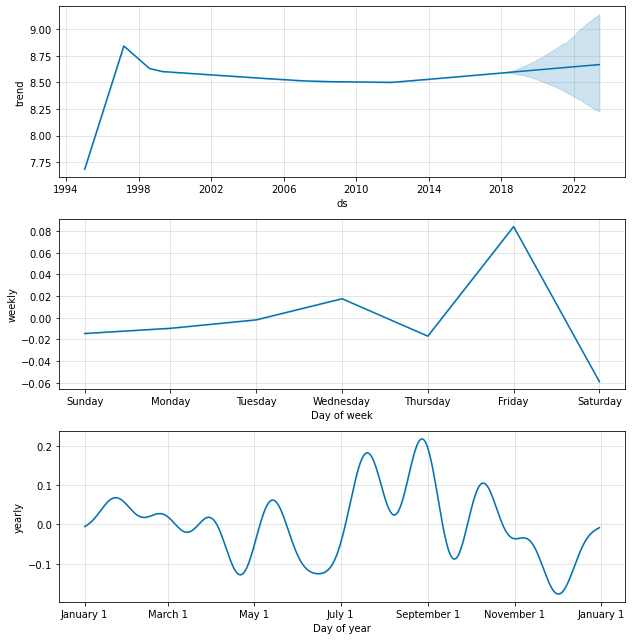

In [29]:
model1.plot_components(predictions)

In [30]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model1, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 41 forecasts with cutoffs between 1997-03-23 00:00:00 and 2016-12-08 00:00:00


  0%|          | 0/41 [00:00<?, ?it/s]

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1997-03-24,9.561927,7.541886,11.555610,8.97,1997-03-23
1,1997-03-25,9.498579,7.458171,11.596105,8.88,1997-03-23
2,1997-03-26,9.723249,7.813727,11.786164,7.04,1997-03-23
3,1997-03-27,9.613718,7.718538,11.625547,7.25,1997-03-23
4,1997-03-28,9.814747,7.807341,11.771995,8.54,1997-03-23


In [31]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,2.454773,1.566772,1.270286,0.152130,0.127831,0.758413
1,38 days,2.454088,1.566553,1.269462,0.152080,0.127831,0.758019
2,39 days,2.456658,1.567373,1.267282,0.151713,0.126950,0.759727
3,40 days,2.469487,1.571460,1.271865,0.152905,0.127831,0.756393
4,41 days,2.436513,1.560933,1.264428,0.151964,0.127554,0.762306


C:\Users\sidda\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\sidda\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


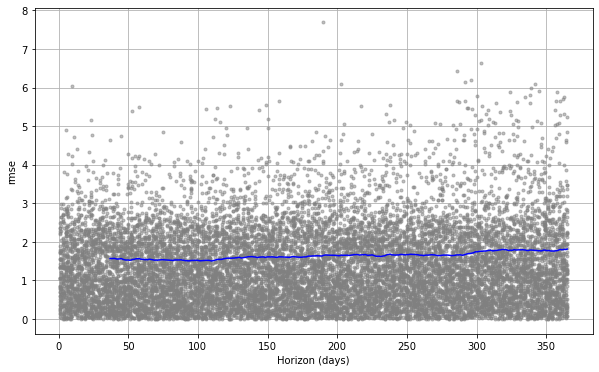

In [32]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [33]:
from sklearn.metrics import mean_absolute_error

MAE: 1.281


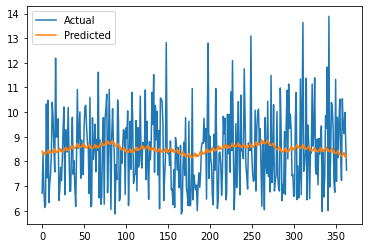

In [34]:
y_true = df['y'][9635:9999].values
y_pred = df_cv['yhat'][9635:9999].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# Predict the next 365days sales

In [35]:
sidha= Prophet()

In [36]:
final_fb = sidha.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [37]:
final_fb

In [38]:
df

,ds,y
0,1995-10-14,7.07
1,1995-10-15,8.35
2,1995-10-16,6.82
3,1995-10-17,6.86
4,1995-10-18,7.45
...,...,...
9995,2023-02-24,9.13
9996,2023-02-25,9.99
9997,2023-02-26,8.84
9998,2023-02-27,7.64


In [39]:
future = final_fb.make_future_dataframe(periods=365)


# define the period for which we want a prediction



In [40]:
 prediction=final_fb.predict(future)
    

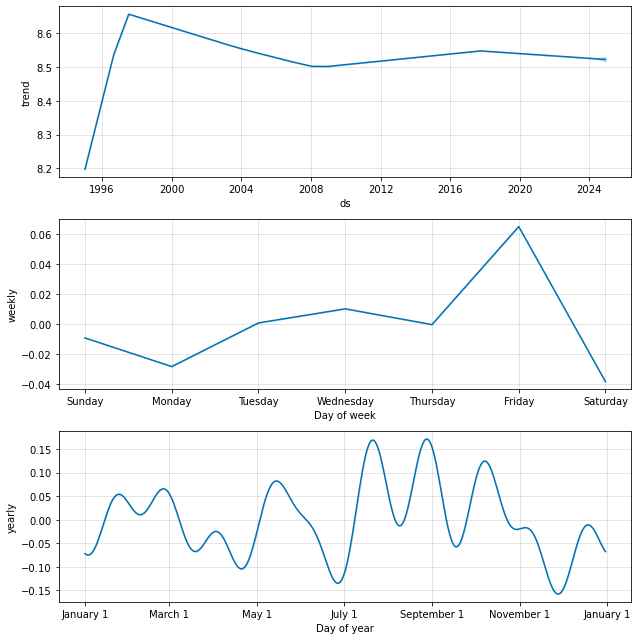

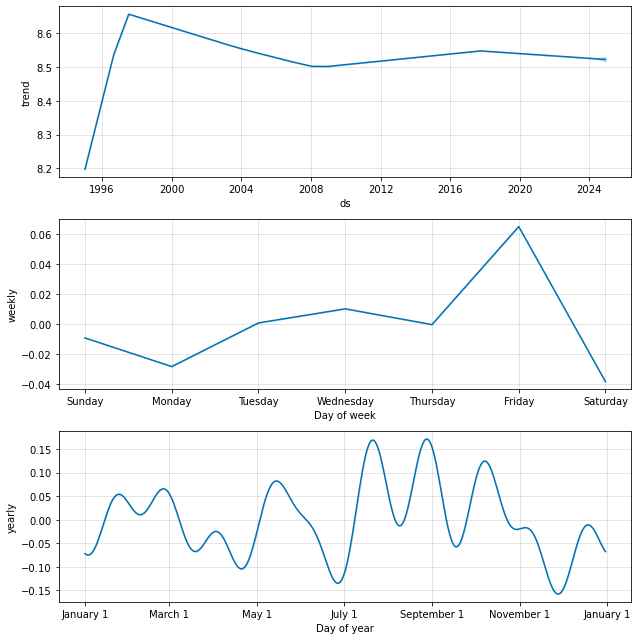

In [41]:
final_fb.plot_components(prediction)

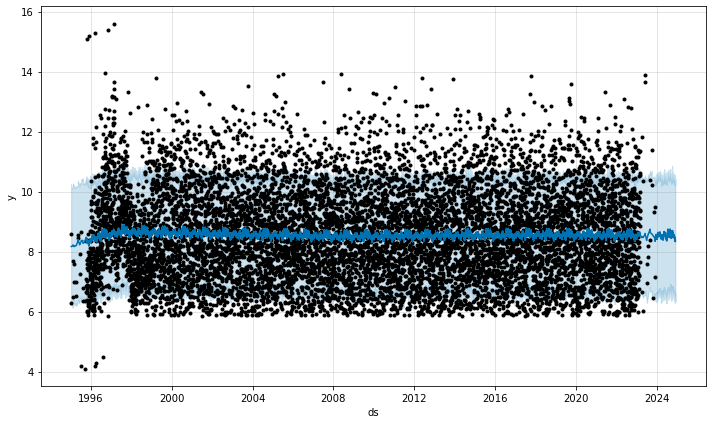

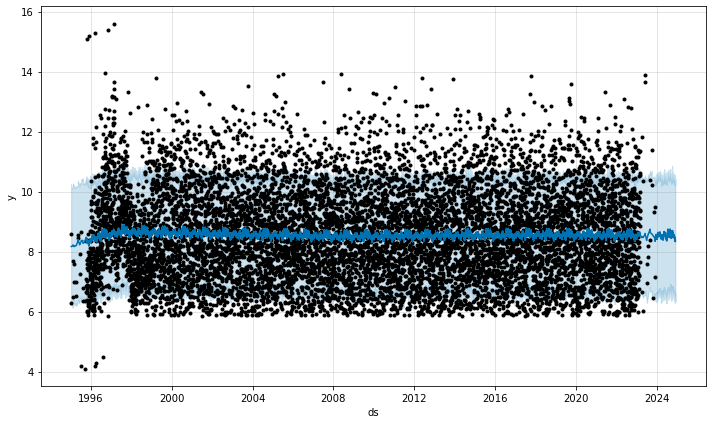

In [42]:
final_fb.plot(prediction)

In [43]:
df_cv = cross_validation(final_fb, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 53 forecasts with cutoffs between 1997-04-17 00:00:00 and 2022-12-02 00:00:00


  0%|          | 0/53 [00:00<?, ?it/s]

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1997-04-18,10.180003,8.129870,12.262420,8.34,1997-04-17
1,1997-04-19,10.242469,8.326737,12.278420,7.30,1997-04-17
2,1997-04-20,10.246953,8.282992,12.234709,10.16,1997-04-17
3,1997-04-21,10.235289,8.387291,12.216483,8.35,1997-04-17
4,1997-04-22,10.273700,8.418975,12.192638,7.21,1997-04-17


In [44]:
from fbprophet.diagnostics import performance_metrics
df_m = performance_metrics(df_cv)
df_m.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,2.294464,1.514749,1.237155,0.151102,0.129596,0.777209
1,37 days,2.275989,1.508638,1.229433,0.150081,0.128374,0.777159
2,38 days,2.273254,1.507731,1.226088,0.149925,0.127952,0.777558
3,39 days,2.259411,1.503134,1.221200,0.149298,0.126001,0.779340
4,40 days,2.288251,1.512697,1.229770,0.150117,0.128244,0.777378


C:\Users\sidda\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\sidda\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


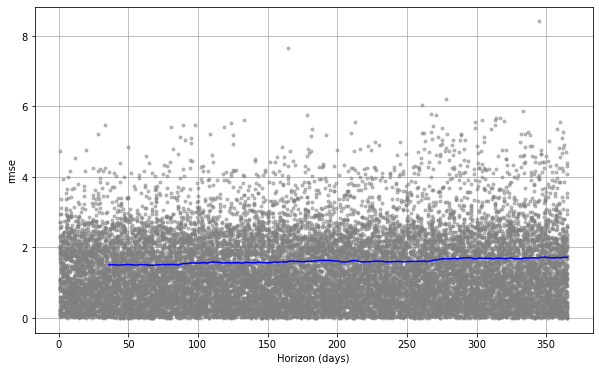

In [45]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [46]:
final=prediction.tail(365)
final.index=inde_f
final

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2023-02-28,2023-12-03,8.526546,6.562149,10.501002,8.526546,8.526546,-0.149232,-0.149232,-0.149232,-0.009173,-0.009173,-0.009173,-0.140059,-0.140059,-0.140059,0.0,0.0,0.0,8.377314
2023-03-01,2023-12-04,8.526536,6.387210,10.320163,8.526536,8.526536,-0.160423,-0.160423,-0.160423,-0.028251,-0.028251,-0.028251,-0.132172,-0.132172,-0.132172,0.0,0.0,0.0,8.366113
2023-03-02,2023-12-05,8.526527,6.594350,10.379779,8.526527,8.526527,-0.122339,-0.122339,-0.122339,0.000829,0.000829,0.000829,-0.123168,-0.123168,-0.123168,0.0,0.0,0.0,8.404188
2023-03-03,2023-12-06,8.526517,6.526260,10.456390,8.526517,8.526517,-0.103061,-0.103061,-0.103061,0.010200,0.010200,0.010200,-0.113261,-0.113261,-0.113261,0.0,0.0,0.0,8.423456
2023-03-04,2023-12-07,8.526508,6.520159,10.323015,8.526508,8.526508,-0.102985,-0.102985,-0.102985,-0.000295,-0.000295,-0.000295,-0.102690,-0.102690,-0.102690,0.0,0.0,0.0,8.423523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,2024-11-27,8.523072,6.288565,10.236174,8.516663,8.529791,-0.147022,-0.147022,-0.147022,0.010200,0.010200,0.010200,-0.157222,-0.157222,-0.157222,0.0,0.0,0.0,8.376050
2024-02-24,2024-11-28,8.523062,6.329296,10.342765,8.516613,8.529808,-0.157723,-0.157723,-0.157723,-0.000295,-0.000295,-0.000295,-0.157428,-0.157428,-0.157428,0.0,0.0,0.0,8.365340
2024-02-25,2024-11-29,8.523053,6.617645,10.388647,8.516560,8.529856,-0.090952,-0.090952,-0.090952,0.064996,0.064996,0.064996,-0.155948,-0.155948,-0.155948,0.0,0.0,0.0,8.432100
2024-02-26,2024-11-30,8.523043,6.348707,10.431006,8.516507,8.529873,-0.191111,-0.191111,-0.191111,-0.038306,-0.038306,-0.038306,-0.152805,-0.152805,-0.152805,0.0,0.0,0.0,8.331932


In [47]:

final=final.drop(['ds'],axis=1)

In [48]:
final

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2023-02-28,8.526546,6.562149,10.501002,8.526546,8.526546,-0.149232,-0.149232,-0.149232,-0.009173,-0.009173,-0.009173,-0.140059,-0.140059,-0.140059,0.0,0.0,0.0,8.377314
2023-03-01,8.526536,6.387210,10.320163,8.526536,8.526536,-0.160423,-0.160423,-0.160423,-0.028251,-0.028251,-0.028251,-0.132172,-0.132172,-0.132172,0.0,0.0,0.0,8.366113
2023-03-02,8.526527,6.594350,10.379779,8.526527,8.526527,-0.122339,-0.122339,-0.122339,0.000829,0.000829,0.000829,-0.123168,-0.123168,-0.123168,0.0,0.0,0.0,8.404188
2023-03-03,8.526517,6.526260,10.456390,8.526517,8.526517,-0.103061,-0.103061,-0.103061,0.010200,0.010200,0.010200,-0.113261,-0.113261,-0.113261,0.0,0.0,0.0,8.423456
2023-03-04,8.526508,6.520159,10.323015,8.526508,8.526508,-0.102985,-0.102985,-0.102985,-0.000295,-0.000295,-0.000295,-0.102690,-0.102690,-0.102690,0.0,0.0,0.0,8.423523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,8.523072,6.288565,10.236174,8.516663,8.529791,-0.147022,-0.147022,-0.147022,0.010200,0.010200,0.010200,-0.157222,-0.157222,-0.157222,0.0,0.0,0.0,8.376050
2024-02-24,8.523062,6.329296,10.342765,8.516613,8.529808,-0.157723,-0.157723,-0.157723,-0.000295,-0.000295,-0.000295,-0.157428,-0.157428,-0.157428,0.0,0.0,0.0,8.365340
2024-02-25,8.523053,6.617645,10.388647,8.516560,8.529856,-0.090952,-0.090952,-0.090952,0.064996,0.064996,0.064996,-0.155948,-0.155948,-0.155948,0.0,0.0,0.0,8.432100
2024-02-26,8.523043,6.348707,10.431006,8.516507,8.529873,-0.191111,-0.191111,-0.191111,-0.038306,-0.038306,-0.038306,-0.152805,-0.152805,-0.152805,0.0,0.0,0.0,8.331932


<AxesSubplot:>

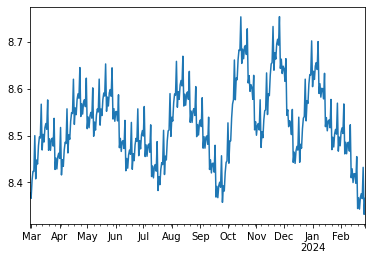

In [49]:
final['yhat'].plot()

In [53]:
import pickle
pickle.dump(final_fb, open('fb.pkl','wb'))

In [55]:
with open('fb.pkl', 'rb') as fin:
    m2 = pickle.load(fin)